##### <img src="mioti.png" style="height: 100px">

# WorkSheet S5: Modelos regresivos aplicados a series temporales

## Modelos regresivos aplicados a series temporales

### Enfoque sobre conjunto de test y entrenamiento para series temporales

En primer lugar vamos a ver las principales diferencias y el efecto que tiene la formación de conjuntos de datos de test y entrenamiento cuando se trata de series temporales, en primer lugar vamos a definir una función para poder cuantificar lo bien que están funcionando nuestros modelos :

## Métricas de evaluación

### $R^2$

La métrica $R^2$ devuelve $1.0$ cuando la corcondancia es perfecta, valor $0$ cuando el método devuelve un valor constante independientemente del valor de entrada, y valores negativos si existe correlación negativa.

$$ R^2 = 1 - \frac{\sum{(y_{true} - y_{pred})^2} }{ \sum{(y_{true} - \bar{y_{true}})^ 2}} $$


## MSE

Otra métrica muy habitual es el error cuadrático medio (ECM), o en inglés *Mean Squared Error* (MSE). El MSE se calcula como la diferencia al cuadrado promediada entre los valores predichos y los valores reales:

$$MSE = \frac{1}{n} \sum (y_{pred} - y_{true})^2$$

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_datos = pd.read_csv('daily-total-female-births.txt')

In [2]:
df_datos.head(5)

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


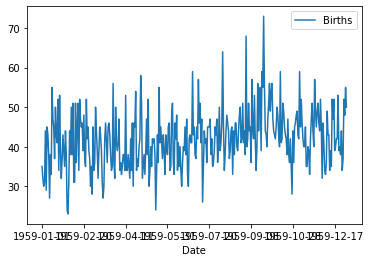

In [3]:
df_datos.plot.line(x = 'Date', 
             y = 'Births')
plt.show()

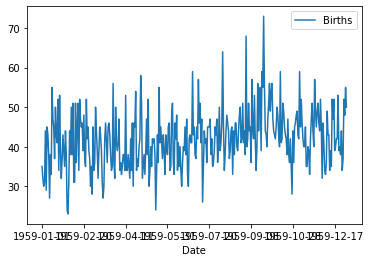

In [4]:
df_datos[:365].plot.line(x = 'Date', 
             y = 'Births')
plt.show()

In [5]:
df_datos['Muestra'] = df_datos.index

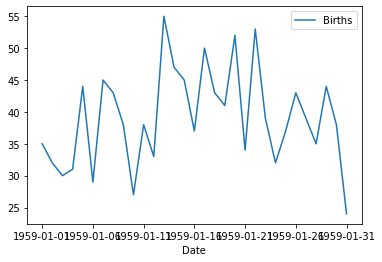

In [6]:
df_datos[:31].plot.line(x = 'Date', 
             y = 'Births')
plt.show()

In [7]:
df_datos.head(5)

,Date,Births,Muestra
0,1959-01-01,35,0
1,1959-01-02,32,1
2,1959-01-03,30,2
3,1959-01-04,31,3
4,1959-01-05,44,4


In [8]:
#y = df_datos['Births'].values()
X = df_datos.Muestra.values
X = X.reshape(X.shape[0], -1)

In [9]:
print(X[:5])

[[0]
 [1]
 [2]
 [3]
 [4]]


In [9]:
y = df_datos.Births.values
print(y)

[35 32 30 31 44 29 45 43 38 27 38 33 55 47 45 37 50 43 41 52 34 53 39 32
 37 43 39 35 44 38 24 23 31 44 38 50 38 51 31 31 51 36 45 51 34 52 47 45
 46 39 48 37 35 52 42 45 39 37 30 35 28 45 34 36 50 44 39 32 39 45 43 39
 31 27 30 42 46 41 36 45 46 43 38 34 35 56 36 32 50 41 39 41 47 34 36 33
 35 38 38 34 53 34 34 38 35 32 42 34 46 30 46 45 54 34 37 35 40 42 58 51
 32 35 38 33 39 47 38 52 30 34 40 35 42 41 42 38 24 34 43 36 55 41 45 41
 37 43 39 33 43 40 38 45 46 34 35 48 51 36 33 46 42 48 34 41 35 40 34 30
 36 40 39 45 38 47 33 30 42 43 41 41 59 43 45 38 37 45 42 57 46 51 41 47
 26 35 44 41 42 36 45 45 45 47 38 42 35 36 39 45 43 47 36 41 50 39 41 46
 64 45 34 38 44 48 46 44 37 39 44 45 33 44 38 46 46 40 39 44 48 50 41 42
 51 41 44 38 68 40 42 51 44 45 36 57 44 42 53 42 34 40 56 44 53 55 39 59
 55 73 55 44 43 40 47 51 56 49 54 56 47 44 43 42 45 50 48 43 40 59 41 42
 51 49 45 43 42 38 47 38 36 42 35 28 44 36 45 46 48 49 43 42 59 45 52 46
 42 40 40 45 35 35 40 39 33 42 47 51 44 40 57 49 45

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=False)
#,shuffle=True

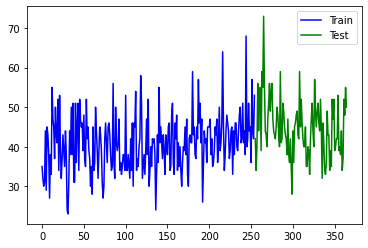

In [11]:
plt.plot(X_train,y_train , color='blue',label='Train')
plt.plot(X_test, y_test, color='green',label='Test')
plt.legend()
plt.show()

In [12]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

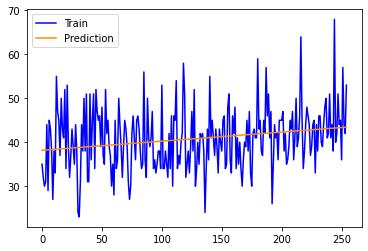

In [13]:
y_pred_train = linear.predict(X_train)
plt.plot(X_train, y_train,color='blue', label='Train')
plt.plot(X_train, y_pred_train,color='darkorange', label='Prediction')
plt.legend()
plt.show()

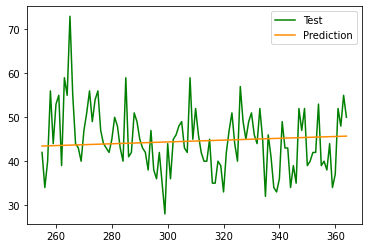

In [14]:
y_pred_test = linear.predict(X_test)
plt.plot(X_test, y_test,color='green',label='Test')
plt.plot(X_test, y_pred_test,color='darkorange', label='Prediction')
plt.legend()
plt.show()

In [15]:
def evalua_modelo(modelo, X_train, X_test, y_train, y_test):
    ## Entrenamiento del modelo
    modelo.fit(X_train, y_train)
    
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(20,10))
    f.suptitle(str(modelo).split('(')[0])
    
    ## Predicción sobre el conjunto de entremaniento para ver cómo ajusta el modelo
    y_pred_train = modelo.predict(X_train)
    ## Cálculo del score
    score_train = modelo.score(X_train, y_train)
    ## Representa resultados
    ax1.plot(X_train, y_train, 'o', color='blue',label='Train')
    ax1.plot(X_train, y_pred_train, '*',color='darkorange',label='Prediction')
    ax1.legend()
    ax1.set_title('Conjunto de entrenamiento (Score %.2f)' % score_train)
    
    ## Predicción sobre el conjunto de test
    y_pred_test = modelo.predict(X_test)
    ## Cálculo del score
    score_test = modelo.score(X_test, y_test)
    ## Representa resultados
    ax2.plot(X_test, y_test, 'o',color='green',label='Test')
    ax2.plot(X_test, y_pred_test, '*',color='darkorange',label='Prediction')
    ax2.legend()
    ax2.set_title('Conjunto de test (Score %.2f)' % score_test)
    
    f.show()
    
    modelo.score(X_test, y_test)
    return modelo

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

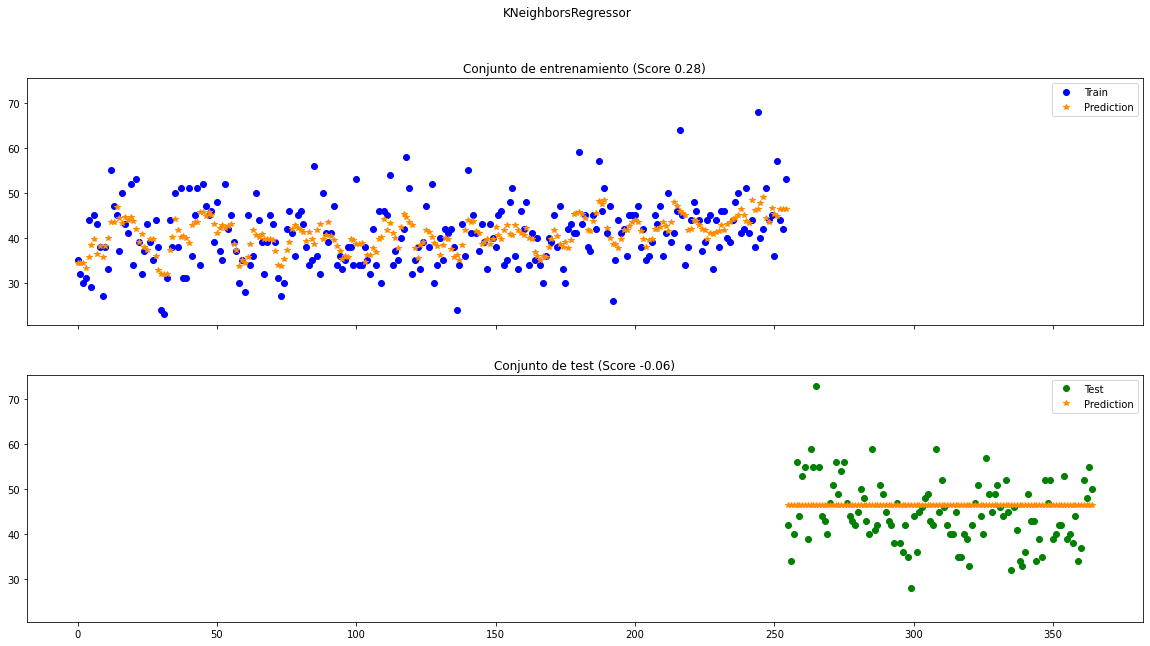

In [16]:
from sklearn.neighbors import KNeighborsRegressor
evalua_modelo(KNeighborsRegressor(n_neighbors=5), X_train, X_test, y_train, y_test)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

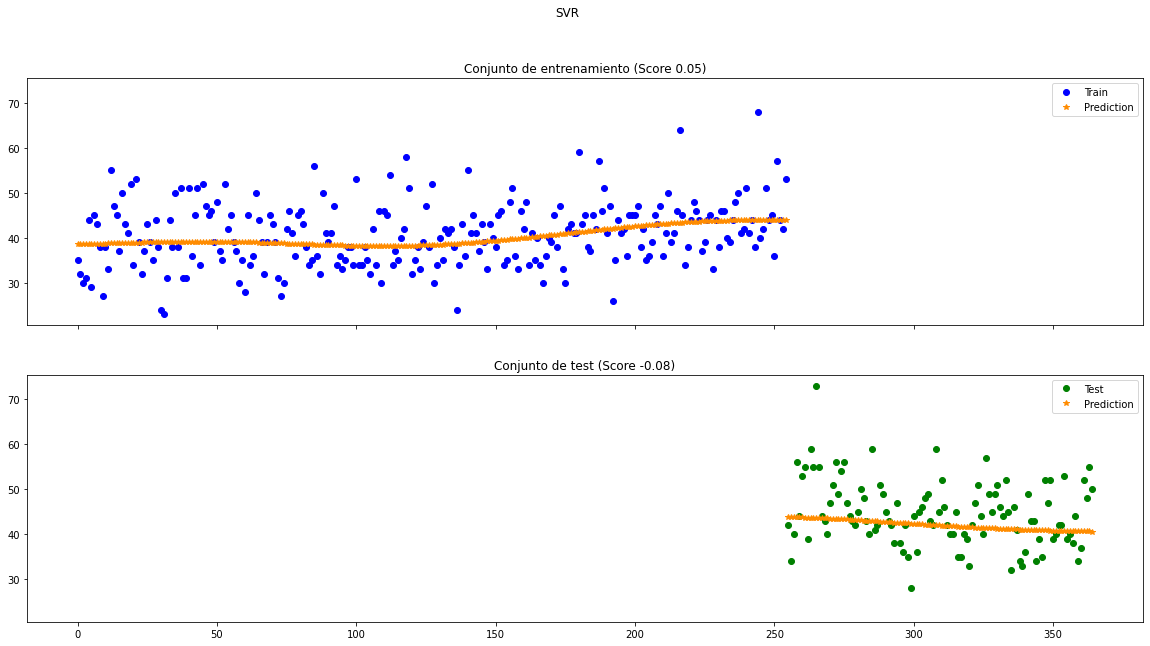

In [17]:
from sklearn.svm import SVR
evalua_modelo(SVR(kernel='rbf'), X_train, X_test, y_train, y_test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

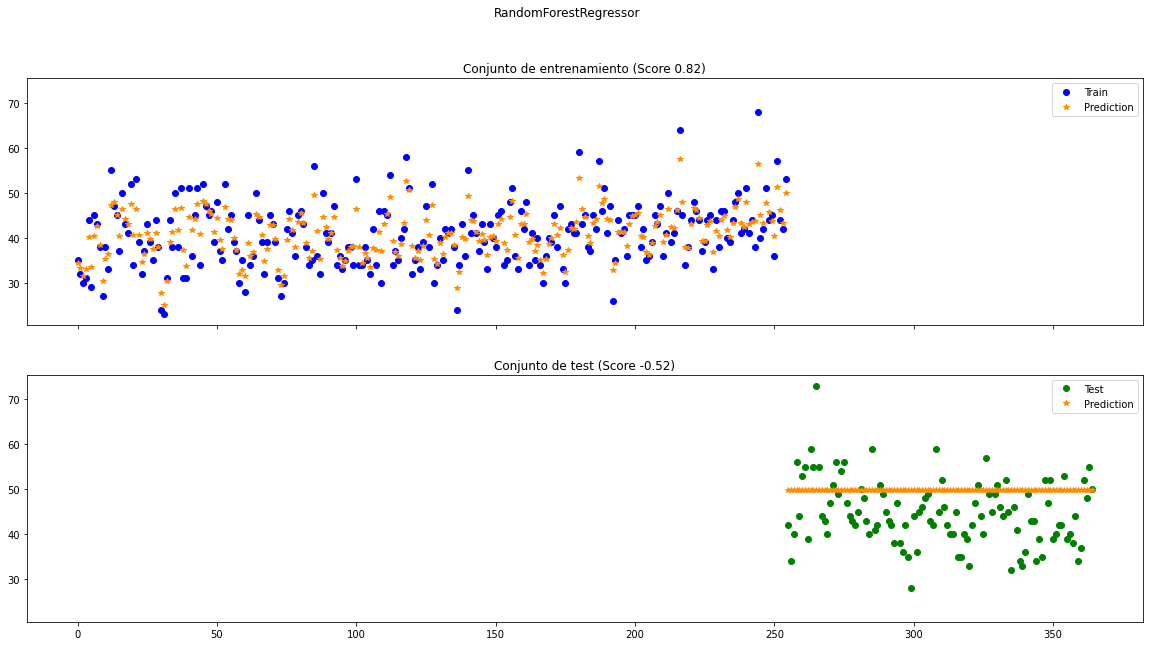

In [18]:
from sklearn.ensemble import RandomForestRegressor
evalua_modelo(RandomForestRegressor(), X_train, X_test, y_train, y_test)

### Importancia de entrenamiento reutilizando los valores predichos

Definición de otra métrica de ealuación y de nuestro metodo de entrenamiento y verificación reutilizando los valores que vamos prediciendo

In [20]:
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))
def calculoEvaluacionModelo(modelo,df,norm):

    xPredicted = []
    yPredicted = []
    ySpotted = []
    mean_error = []

    for month in range(300,365):
        train = df[df['Muestra'] < month]
        val = df[df['Muestra'] == month]       
        
        xtr, xts = train.drop(['Births','Date'], axis=1), val.drop(['Births','Date'], axis=1)
        
        if(norm==True):
            sc = StandardScaler()  
            xtr = sc.fit_transform(xtr)  
            xts = sc.transform(xts)  
        ytr, yts = train['Births'].values, val['Births'].values  

        mdl = modelo
        mdl.fit(xtr, ytr)

        p = mdl.predict(xts)

        xPredicted=xPredicted + [month]
        yPredicted=yPredicted + [p[0]]
        ySpotted = ySpotted + [yts[0]]

        error = rmsle(yts, p)
        print('Month %d - Error %.5f' % (month, error))
        mean_error.append(error)

    print('Mean Error = %.5f' % np.mean(mean_error))
    prediction = pd.DataFrame(
        {'Births predicted': yPredicted,
         'Births actually spotted': ySpotted
        },index=xPredicted)
    prediction.plot()

Month 300 - Error 0.31349
Month 301 - Error 0.06867
Month 302 - Error 0.17902
Month 303 - Error 0.07785
Month 304 - Error 0.06253
Month 305 - Error 0.05509
Month 306 - Error 0.10600
Month 307 - Error 0.07265
Month 308 - Error 0.29818
Month 309 - Error 0.14954
Month 310 - Error 0.09203
Month 311 - Error 0.09007
Month 312 - Error 0.12078
Month 313 - Error 0.09020
Month 314 - Error 0.03051
Month 315 - Error 0.10681
Month 316 - Error 0.20543
Month 317 - Error 0.07025
Month 318 - Error 0.09726
Month 319 - Error 0.01511
Month 320 - Error 0.16177
Month 321 - Error 0.17048
Month 322 - Error 0.18132
Month 323 - Error 0.14837
Month 324 - Error 0.09349
Month 325 - Error 0.13934
Month 326 - Error 0.29831
Month 327 - Error 0.05012
Month 328 - Error 0.08698
Month 329 - Error 0.02778
Month 330 - Error 0.05800
Month 331 - Error 0.08852
Month 332 - Error 0.07222
Month 333 - Error 0.14601
Month 334 - Error 0.07515
Month 335 - Error 0.36464
Month 336 - Error 0.19302
Month 337 - Error 0.03991
Month 338 - 

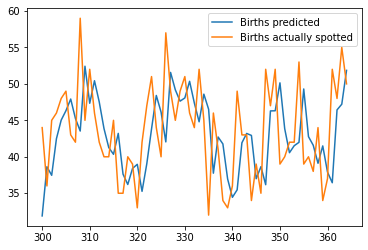

In [21]:
from sklearn.linear_model import RANSACRegressor
calculoEvaluacionModelo(RandomForestRegressor(),df_datos,False)

Month 300 - Error 0.10783
Month 301 - Error 0.08543
Month 302 - Error 0.14981
Month 303 - Error 0.16377
Month 304 - Error 0.18559
Month 305 - Error 0.20334
Month 306 - Error 0.04890
Month 307 - Error 0.00935
Month 308 - Error 0.34249
Month 309 - Error 0.02198
Month 310 - Error 0.12655
Month 311 - Error 0.01058
Month 312 - Error 0.12036
Month 313 - Error 0.16179
Month 314 - Error 0.14926
Month 315 - Error 0.01724
Month 316 - Error 0.25378
Month 317 - Error 0.23639
Month 318 - Error 0.09087
Month 319 - Error 0.07232
Month 320 - Error 0.22079
Month 321 - Error 0.05990
Month 322 - Error 0.17982
Month 323 - Error 0.24748
Month 324 - Error 0.07616
Month 325 - Error 0.02648
Month 326 - Error 0.33234
Month 327 - Error 0.13239
Month 328 - Error 0.01754
Month 329 - Error 0.08992
Month 330 - Error 0.10750
Month 331 - Error 0.03142
Month 332 - Error 0.08311
Month 333 - Error 0.08667
Month 334 - Error 0.05704
Month 335 - Error 0.39122
Month 336 - Error 0.02105
Month 337 - Error 0.11035
Month 338 - 

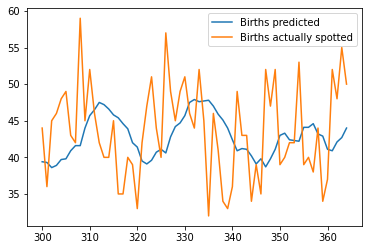

In [22]:
calculoEvaluacionModelo(KNeighborsRegressor(n_neighbors=10),df_datos,False)

Month 300 - Error 0.34186
Month 301 - Error 0.08320
Month 302 - Error 0.18633
Month 303 - Error 0.09548
Month 304 - Error 0.05884
Month 305 - Error 0.04228
Month 306 - Error 0.11089
Month 307 - Error 0.05783
Month 308 - Error 0.31084
Month 309 - Error 0.16625
Month 310 - Error 0.07257
Month 311 - Error 0.10359
Month 312 - Error 0.12325
Month 313 - Error 0.10216
Month 314 - Error 0.03593
Month 315 - Error 0.10054
Month 316 - Error 0.20588
Month 317 - Error 0.07413
Month 318 - Error 0.09942
Month 319 - Error 0.00753
Month 320 - Error 0.16252
Month 321 - Error 0.16608
Month 322 - Error 0.16645
Month 323 - Error 0.12260
Month 324 - Error 0.09349
Month 325 - Error 0.11702
Month 326 - Error 0.30087
Month 327 - Error 0.07455
Month 328 - Error 0.10260
Month 329 - Error 0.02943
Month 330 - Error 0.05332
Month 331 - Error 0.08910
Month 332 - Error 0.07263
Month 333 - Error 0.14100
Month 334 - Error 0.08817
Month 335 - Error 0.35979
Month 336 - Error 0.19018
Month 337 - Error 0.07143
Month 338 - 

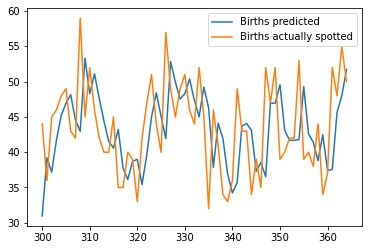

In [23]:
calculoEvaluacionModelo(RandomForestRegressor(),df_datos,False)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 300 - Error 0.30307
Month 301 - Error 0.63461
Month 302 - Error 0.38569
Month 303 - Error 0.37361
Month 304 - Error 0.33612
Month 305 - Error 0.34297
Month 306 - Error 0.46316


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 307 - Error 0.34321


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 308 - Error 0.00307
Month 309 - Error 0.41874


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 310 - Error 0.13752


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 311 - Error 0.28758
Month 312 - Error 0.45534


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 313 - Error 0.40757
Month 314 - Error 0.50863
Month 315 - Error 0.43558
Month 316 - Error 0.67277


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 317 - Error 0.44754


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 318 - Error 0.39268
Month 319 - Error 0.56137
Month 320 - Error 0.73646
Month 321 - Error 0.49717
Month 322 - Error 0.38375
Month 323 - Error 0.29813


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 324 - Error 0.43790
Month 325 - Error 0.37368
Month 326 - Error 0.18252
Month 327 - Error 0.32443
Month 328 - Error 0.42606
Month 329 - Error 0.30863
Month 330 - Error 0.30467


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 331 - Error 0.24916
Month 332 - Error 0.45705
Month 333 - Error 0.29095
Month 334 - Error 0.43339
Month 335 - Error 0.75583


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 336 - Error 0.28392
Month 337 - Error 0.51432


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 338 - Error 0.56623
Month 339 - Error 0.71239
Month 340 - Error 0.63512
Month 341 - Error 0.31631


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 342 - Error 0.30168
Month 343 - Error 0.47489
Month 344 - Error 0.67663


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 345 - Error 0.43338
Month 346 - Error 0.63203
Month 347 - Error 0.26910


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 348 - Error 0.21732


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 349 - Error 0.15016
Month 350 - Error 0.57427
Month 351 - Error 0.53851
Month 352 - Error 0.48914
Month 353 - Error 0.48801
Month 354 - Error 0.27696
Month 355 - Error 0.59467


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 356 - Error 0.38730
Month 357 - Error 0.58800


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 358 - Error 0.31733
Month 359 - Error 0.70683
Month 360 - Error 0.61470
Month 361 - Error 0.29174


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 362 - Error 0.22180
Month 363 - Error 0.23711
Month 364 - Error 0.33301
Mean Error = 0.41867


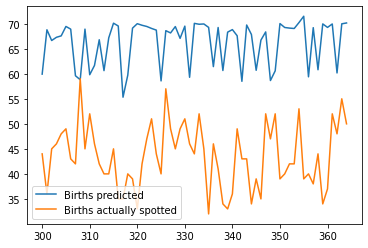

In [24]:
from sklearn.neural_network import MLPRegressor
calculoEvaluacionModelo(MLPRegressor(),df_datos,False)
#calculoEvaluacionModelo(MLPRegressor(activation='logistic'),df_datos,False)

Month 300 - Error 0.26374
Month 301 - Error 0.00276
Month 302 - Error 0.23755
Month 303 - Error 0.27809
Month 304 - Error 0.21549
Month 305 - Error 0.20245
Month 306 - Error 0.01504
Month 307 - Error 0.02367
Month 308 - Error 0.31709
Month 309 - Error 0.04665
Month 310 - Error 0.16898
Month 311 - Error 0.01737
Month 312 - Error 0.08121
Month 313 - Error 0.12620
Month 314 - Error 0.07695
Month 315 - Error 0.07834
Month 316 - Error 0.20792
Month 317 - Error 0.15686
Month 318 - Error 0.01189
Month 319 - Error 0.01984
Month 320 - Error 0.16903
Month 321 - Error 0.08895
Month 322 - Error 0.19258
Month 323 - Error 0.27339
Month 324 - Error 0.08263
Month 325 - Error 0.04394
Month 326 - Error 0.34381
Month 327 - Error 0.15411
Month 328 - Error 0.01222
Month 329 - Error 0.07982
Month 330 - Error 0.10981
Month 331 - Error 0.00115
Month 332 - Error 0.05220
Month 333 - Error 0.10796
Month 334 - Error 0.04652
Month 335 - Error 0.38140
Month 336 - Error 0.02548
Month 337 - Error 0.11992
Month 338 - 

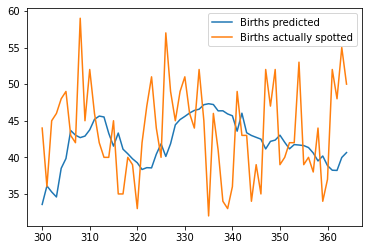

In [25]:
from sklearn.svm import SVR
calculoEvaluacionModelo(SVR(C = 2000) ,df_datos,False)

Month 300 - Error 0.02986
Month 301 - Error 0.16801
Month 302 - Error 0.05399
Month 303 - Error 0.07263
Month 304 - Error 0.10700
Month 305 - Error 0.12386
Month 306 - Error 0.01062
Month 307 - Error 0.02537
Month 308 - Error 0.30948
Month 309 - Error 0.04309
Month 310 - Error 0.17697
Month 311 - Error 0.05133
Month 312 - Error 0.04240
Month 313 - Error 0.08408
Month 314 - Error 0.07701
Month 315 - Error 0.04785
Month 316 - Error 0.20643
Month 317 - Error 0.19607
Month 318 - Error 0.06270
Month 319 - Error 0.08034
Month 320 - Error 0.23937
Month 321 - Error 0.00859
Month 322 - Error 0.11344
Month 323 - Error 0.18987
Month 324 - Error 0.04418
Month 325 - Error 0.05036
Month 326 - Error 0.29995
Month 327 - Error 0.14968
Month 328 - Error 0.06027
Month 329 - Error 0.13213
Month 330 - Error 0.16137
Month 331 - Error 0.05240
Month 332 - Error 0.00460
Month 333 - Error 0.16612
Month 334 - Error 0.02287
Month 335 - Error 0.31049
Month 336 - Error 0.04450
Month 337 - Error 0.06903
Month 338 - 

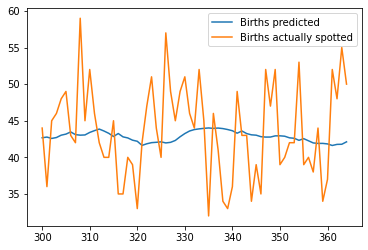

In [26]:
from sklearn.svm import SVR
calculoEvaluacionModelo(SVR(kernel='rbf') ,df_datos,False)

## Mejoras e iteraciones sobre nuestros modelos

## Objetivo

El objetivo de este challenge es mejorar el uso las técnicas de regresión aprendidas, para ello, vamos a realizar una predicción sobre las manchas solares avistadas en Zúrich.

## 1. Configuración del entorno

Cargamos los paquetes que vamos a utilizar en la sesión.

In [19]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [20]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## 2. Análisis de los datos de partida

En este caso vamos a utilizar un dataset obtenido de dataMarket, en el que se incluye el avistamiento de estas manchas solares :
https://datamarket.com/data/set/22ti/zuerich-monthly-sunspot-numbers-1749-1983#!ds=22ti&display=line



In [21]:
dataZurich = pd.read_csv('zuerich-monthly-sunspot-numbers.csv', delimiter=';')
dataZurich.head(20)

,Month,Zuerich monthly sunspot numbers 1749-1983
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
5,1749-06,83.5
6,1749-07,94.8
7,1749-08,66.3
8,1749-09,75.9
9,1749-10,75.5


In [30]:
dataZurich.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2821 entries, 0 to 2820
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Month                                      2821 non-null   object 
 1   Zuerich monthly sunspot numbers 1749-1983  2820 non-null   float64
dtypes: float64(1), object(1)
memory usage: 44.2+ KB


In [31]:
dataZurich.tail(20)

,Month,Zuerich monthly sunspot numbers 1749-1983
2801,1982-06,110.4
2802,1982-07,106.1
2803,1982-08,107.6
2804,1982-09,118.8
2805,1982-10,94.7
2806,1982-11,98.1
2807,1982-12,127.0
2808,1983-01,84.3
2809,1983-02,51.0
2810,1983-03,66.5


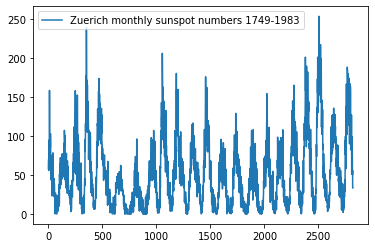

In [32]:
dataZurich.plot()

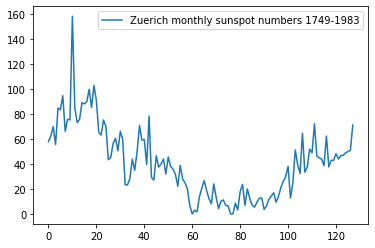

In [33]:
dataZurich[:128].plot()

## 3. Transformación del dataset

Vamos a adaptar nuestros datos de entrada a un dataset con el que poder trabajar. Para ello vamos a crear nuestro atributo X y nuestra variable y.


** Crea el dataset con las indicaciones anteriores**

In [34]:
dataZurich.dropna(inplace=True)

In [35]:
dataZurich.head()

,Month,Zuerich monthly sunspot numbers 1749-1983
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [36]:
dataZurich['Muestra'] = dataZurich.index

In [37]:
dataZurich.head()

,Month,Zuerich monthly sunspot numbers 1749-1983,Muestra
0,1749-01,58.0,0
1,1749-02,62.6,1
2,1749-03,70.0,2
3,1749-04,55.7,3
4,1749-05,85.0,4


In [38]:
zurich_X = dataZurich.Muestra.values
zurich_X

array([   0,    1,    2, ..., 2817, 2818, 2819])

In [39]:
zurich_X = zurich_X.reshape(zurich_X.shape[0], -1)

In [40]:
zurich_X.shape

(2820, 1)

In [41]:
zurich_X

array([[   0],
       [   1],
       [   2],
       ...,
       [2817],
       [2818],
       [2819]])

In [42]:
dataZurich=dataZurich.rename(columns={'Zuerich monthly sunspot numbers 1749-1983':'NumManchas'})
zurich_Y = dataZurich.NumManchas.values

In [43]:
zurich_Y.shape

(2820,)

In [44]:
zurich_Y

array([58. , 62.6, 70. , ..., 55.8, 33.3, 33.4])

In [45]:
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

In [46]:
def calculoEvaluacionModelo(modelo,df,norm):

    xPredicted = []
    yPredicted = []
    ySpotted = []
    mean_error = []

    for month in range(2780,2819):
        train = df[df['Muestra'] < month]
        val = df[df['Muestra'] == month]       
        
        xtr, xts = train.drop(['NumManchas','Month'], axis=1), val.drop(['NumManchas','Month'], axis=1)
        
        if(norm==True):
            sc = StandardScaler()  
            xtr = sc.fit_transform(xtr)  
            xts = sc.transform(xts)  
        ytr, yts = train['NumManchas'].values, val['NumManchas'].values  

        mdl = modelo
        mdl.fit(xtr, ytr)

        p = mdl.predict(xts)

        xPredicted=xPredicted + [month]
        yPredicted=yPredicted + [p[0]]
        ySpotted = ySpotted + [yts[0]]

        error = rmsle(yts, p)
        print('Month %d - Error %.5f' % (month, error))
        mean_error.append(error)

    print('Mean Error = %.5f' % np.mean(mean_error))
    prediction = pd.DataFrame(
        {'SunSpots predicted': yPredicted,
         'SunSpots actually spotted': ySpotted
        },index=xPredicted)
    prediction.plot()

In [47]:
norma = False

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 2780 - Error 0.98898
Month 2781 - Error 0.93656
Month 2782 - Error 0.72482
Month 2783 - Error 0.64979


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 2784 - Error 0.55375
Month 2785 - Error 0.92320
Month 2786 - Error 0.40415
Month 2787 - Error 0.66411
Month 2788 - Error 0.70634


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 2789 - Error 0.39359


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 2790 - Error 0.62212


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 2791 - Error 0.88574
Month 2792 - Error 1.04899
Month 2793 - Error 0.67345
Month 2794 - Error 0.58554


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 2795 - Error 0.80909
Month 2796 - Error 0.60121
Month 2797 - Error 0.74130


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 2798 - Error 0.76410


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 2799 - Error 0.74277
Month 2800 - Error 0.40100
Month 2801 - Error 0.38239
Month 2802 - Error 0.28146
Month 2803 - Error 0.39330
Month 2804 - Error 0.51165
Month 2805 - Error 0.15739
Month 2806 - Error 0.06855
Month 2807 - Error 0.52852
Month 2808 - Error 0.15301
Month 2809 - Error 0.49589
Month 2810 - Error 0.00637
Month 2811 - Error 0.04424
Month 2812 - Error 0.41350
Month 2813 - Error 0.64260
Month 2814 - Error 0.19716
Month 2815 - Error 0.07433


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Month 2816 - Error 0.33572
Month 2817 - Error 0.28549
Month 2818 - Error 0.44328
Mean Error = 0.51886
Month 2780 - Error 0.77575
Month 2781 - Error 0.77884
Month 2782 - Error 1.02955
Month 2783 - Error 0.99669
Month 2784 - Error 0.30009
Month 2785 - Error 0.72992
Month 2786 - Error 0.96263
Month 2787 - Error 0.81981
Month 2788 - Error 0.30709
Month 2789 - Error 0.31432
Month 2790 - Error 0.95669
Month 2791 - Error 0.71673
Month 2792 - Error 0.60194
Month 2793 - Error 1.01439
Month 2794 - Error 0.75305
Month 2795 - Error 0.72389
Month 2796 - Error 0.81497
Month 2797 - Error 0.77656
Month 2798 - Error 0.63672
Month 2799 - Error 0.52626
Month 2800 - Error 0.03927
Month 2801 - Error 0.31019
Month 2802 - Error 0.45638
Month 2803 - Error 0.21930
Month 2804 - Error 0.44689
Month 2805 - Error 0.21522
Month 2806 - Error 0.24765
Month 2807 - Error 0.85159
Month 2808 - Error 0.53577
Month 2809 - Error 0.15139
Month 2810 - Error 0.36285
Month 2811 - Error 0.01424
Month 2812 - Error 0.16555
Month 2

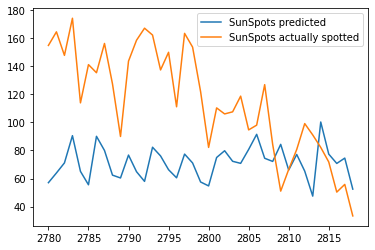

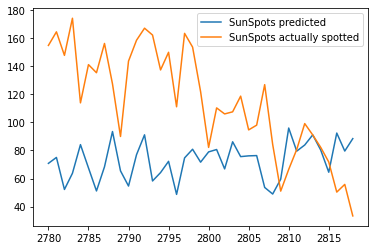

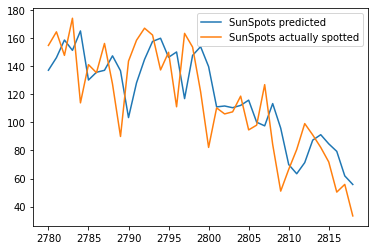

In [48]:
calculoEvaluacionModelo(MLPRegressor(),dataZurich,norma)
calculoEvaluacionModelo(MLPRegressor(max_iter=10000),dataZurich,norma)
calculoEvaluacionModelo(RandomForestRegressor(n_estimators=20, random_state=0),dataZurich,norma)


## Creación de variables sinteticas para mejora de la predicción 

* Lags y diferencias

Para poder apoyar las variables que tenemos en la predicción de series temporales muchas veces es útil crear variables sintéticas a partir de la que tenemos, lags que serían valores anteriores y diferencias que las obtendríamos restando esos valores anteriores

In [49]:
dataZurich2 = dataZurich.copy()
dataZurich2['NumManchas_prev'] = dataZurich2['NumManchas'].shift()
dataZurich2['NumManchas_Diff'] = dataZurich2['NumManchas_prev'].diff()
dataZurich2.head()

,Month,NumManchas,Muestra,NumManchas_prev,NumManchas_Diff
0,1749-01,58.0,0,NaN,NaN
1,1749-02,62.6,1,58.0,NaN
2,1749-03,70.0,2,62.6,4.6
3,1749-04,55.7,3,70.0,7.4
4,1749-05,85.0,4,55.7,-14.3


In [50]:
dataZurich2 = dataZurich2.dropna()

In [51]:
dataZurich2.head()

,Month,NumManchas,Muestra,NumManchas_prev,NumManchas_Diff
2,1749-03,70.0,2,62.6,4.6
3,1749-04,55.7,3,70.0,7.4
4,1749-05,85.0,4,55.7,-14.3
5,1749-06,83.5,5,85.0,29.3
6,1749-07,94.8,6,83.5,-1.5


Month 2780 - Error 0.16606
Month 2781 - Error 0.08821
Month 2782 - Error 0.11530
Month 2783 - Error 0.16285
Month 2784 - Error 0.35038
Month 2785 - Error 0.12764
Month 2786 - Error 0.04493
Month 2787 - Error 0.16357
Month 2788 - Error 0.11897
Month 2789 - Error 0.39074
Month 2790 - Error 0.42565
Month 2791 - Error 0.24392
Month 2792 - Error 0.13365
Month 2793 - Error 0.02096
Month 2794 - Error 0.13525
Month 2795 - Error 0.02995
Month 2796 - Error 0.30556
Month 2797 - Error 0.31900
Month 2798 - Error 0.07401
Month 2799 - Error 0.23240
Month 2800 - Error 0.47799
Month 2801 - Error 0.12000
Month 2802 - Error 0.10730
Month 2803 - Error 0.08445
Month 2804 - Error 0.10196
Month 2805 - Error 0.10786
Month 2806 - Error 0.00687
Month 2807 - Error 0.22197
Month 2808 - Error 0.31583
Month 2809 - Error 0.60431
Month 2810 - Error 0.07832
Month 2811 - Error 0.27621
Month 2812 - Error 0.30989
Month 2813 - Error 0.02748
Month 2814 - Error 0.08800
Month 2815 - Error 0.22294
Month 2816 - Error 0.37199
M

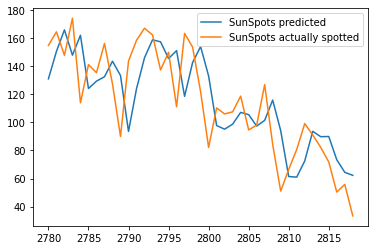

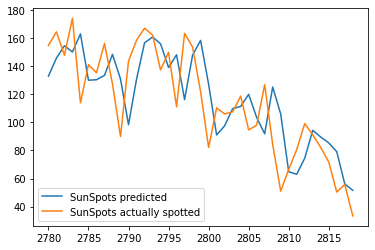

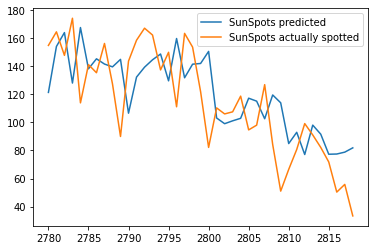

In [52]:
calculoEvaluacionModelo(MLPRegressor(),dataZurich2,norma)
calculoEvaluacionModelo(MLPRegressor(max_iter=10000),dataZurich2,norma)
calculoEvaluacionModelo(RandomForestRegressor(n_estimators=20, random_state=0),dataZurich2,norma)

In [53]:
dataZurich3 = dataZurich.copy()
dataZurich3['NumManchas_prev'] = dataZurich3['NumManchas'].shift()
dataZurich3['NumManchas_prev_2'] = dataZurich3['NumManchas'].shift(2)
dataZurich3['NumManchas_prev_3'] = dataZurich3['NumManchas'].shift(3)
dataZurich3['NumManchas_prev_4'] = dataZurich3['NumManchas'].shift(4)
dataZurich3['NumManchas_Diff'] = dataZurich3['NumManchas_prev'].diff()
dataZurich3['NumManchas_Diff_2'] = dataZurich3['NumManchas_prev'].diff(2)
dataZurich3['NumManchas_Diff_3'] = dataZurich3['NumManchas_prev'].diff(3)
dataZurich3['NumManchas_Diff_4'] = dataZurich3['NumManchas_prev'].diff(4)
dataZurich3.head()

,Month,NumManchas,Muestra,NumManchas_prev,NumManchas_prev_2,NumManchas_prev_3,NumManchas_prev_4,NumManchas_Diff,NumManchas_Diff_2,NumManchas_Diff_3,NumManchas_Diff_4
0,1749-01,58.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1749-02,62.6,1,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1749-03,70.0,2,62.6,58.0,NaN,NaN,4.6,NaN,NaN,NaN
3,1749-04,55.7,3,70.0,62.6,58.0,NaN,7.4,12.0,NaN,NaN
4,1749-05,85.0,4,55.7,70.0,62.6,58.0,-14.3,-6.9,-2.3,NaN


In [54]:
dataZurich3 = dataZurich3.dropna()

In [55]:
dataZurich3.head()

,Month,NumManchas,Muestra,NumManchas_prev,NumManchas_prev_2,NumManchas_prev_3,NumManchas_prev_4,NumManchas_Diff,NumManchas_Diff_2,NumManchas_Diff_3,NumManchas_Diff_4
5,1749-06,83.5,5,85.0,55.7,70.0,62.6,29.3,15.0,22.4,27.0
6,1749-07,94.8,6,83.5,85.0,55.7,70.0,-1.5,27.8,13.5,20.9
7,1749-08,66.3,7,94.8,83.5,85.0,55.7,11.3,9.8,39.1,24.8
8,1749-09,75.9,8,66.3,94.8,83.5,85.0,-28.5,-17.2,-18.7,10.6
9,1749-10,75.5,9,75.9,66.3,94.8,83.5,9.6,-18.9,-7.6,-9.1


Month 2780 - Error 0.10173
Month 2781 - Error 0.13259
Month 2782 - Error 0.06161
Month 2783 - Error 0.19611
Month 2784 - Error 0.35729
Month 2785 - Error 0.06364
Month 2786 - Error 0.02353
Month 2787 - Error 0.15980
Month 2788 - Error 0.10857
Month 2789 - Error 0.35781
Month 2790 - Error 0.31358
Month 2791 - Error 0.10965
Month 2792 - Error 0.16142
Month 2793 - Error 0.06681
Month 2794 - Error 0.12811
Month 2795 - Error 0.04374
Month 2796 - Error 0.29686
Month 2797 - Error 0.28497
Month 2798 - Error 0.00284
Month 2799 - Error 0.19313
Month 2800 - Error 0.40619
Month 2801 - Error 0.04300
Month 2802 - Error 0.05344
Month 2803 - Error 0.02237
Month 2804 - Error 0.10227
Month 2805 - Error 0.15871
Month 2806 - Error 0.08076
Month 2807 - Error 0.17631
Month 2808 - Error 0.35131
Month 2809 - Error 0.65763
Month 2810 - Error 0.06999
Month 2811 - Error 0.03671
Month 2812 - Error 0.23927
Month 2813 - Error 0.01397
Month 2814 - Error 0.08120
Month 2815 - Error 0.15520
Month 2816 - Error 0.48185
M

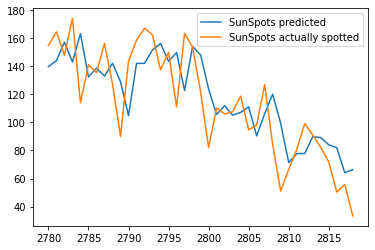

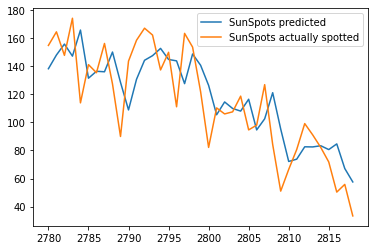

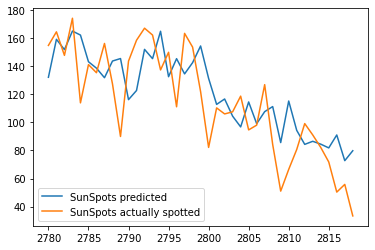

In [56]:
calculoEvaluacionModelo(MLPRegressor(),dataZurich3,norma)
calculoEvaluacionModelo(MLPRegressor(max_iter=10000),dataZurich3,norma)
calculoEvaluacionModelo(RandomForestRegressor(n_estimators=20, random_state=0),dataZurich3,norma)

In [57]:
dataZurich4 = dataZurich.copy()

dataZurich4['NumManchas_prev'] = dataZurich4['NumManchas'].shift()
dataZurich4['NumManchas_prev_2'] = dataZurich4['NumManchas'].shift(2)
dataZurich4['NumManchas_prev_3'] = dataZurich4['NumManchas'].shift(3)
dataZurich4['NumManchas_prev_4'] = dataZurich4['NumManchas'].shift(4)
dataZurich4['NumManchas_prev_5'] = dataZurich4['NumManchas'].shift(5)
dataZurich4['NumManchas_prev_6'] = dataZurich4['NumManchas'].shift(6)
dataZurich4['NumManchas_prev_7'] = dataZurich4['NumManchas'].shift(7)
dataZurich4['NumManchas_prev_8'] = dataZurich4['NumManchas'].shift(8)
dataZurich4['NumManchas_prev_9'] = dataZurich4['NumManchas'].shift(9)
dataZurich4['NumManchas_prev_10'] = dataZurich4['NumManchas'].shift(10)
dataZurich4['NumManchas_prev_11'] = dataZurich4['NumManchas'].shift(11)
dataZurich4['NumManchas_prev_12'] = dataZurich4['NumManchas'].shift(12)
dataZurich4['NumManchas_Diff'] = dataZurich4['NumManchas_prev'].diff()
dataZurich4['NumManchas_Diff_2'] = dataZurich4['NumManchas_prev'].diff(2)
dataZurich4['NumManchas_Diff_3'] = dataZurich4['NumManchas_prev'].diff(3)
dataZurich4['NumManchas_Diff_4'] = dataZurich4['NumManchas_prev'].diff(4)
dataZurich4['NumManchas_Diff_5'] = dataZurich4['NumManchas_prev'].shift(5)
dataZurich4['NumManchas_Diff_6'] = dataZurich4['NumManchas_prev'].shift(6)
dataZurich4['NumManchas_Diff_7'] = dataZurich4['NumManchas_prev'].shift(7)
dataZurich4['NumManchas_Diff_8'] = dataZurich4['NumManchas_prev'].shift(8)
dataZurich4['NumManchas_Diff_9'] = dataZurich4['NumManchas_prev'].shift(9)
dataZurich4['NumManchas_Diff_10'] = dataZurich4['NumManchas_prev'].shift(10)
dataZurich4['NumManchas_Diff_11'] = dataZurich4['NumManchas_prev'].shift(11)
dataZurich4['NumManchas_Diff_12'] = dataZurich4['NumManchas_prev'].shift(12)

dataZurich4.head()

,Month,NumManchas,Muestra,NumManchas_prev,NumManchas_prev_2,NumManchas_prev_3,NumManchas_prev_4,NumManchas_prev_5,NumManchas_prev_6,NumManchas_prev_7,...,NumManchas_Diff_3,NumManchas_Diff_4,NumManchas_Diff_5,NumManchas_Diff_6,NumManchas_Diff_7,NumManchas_Diff_8,NumManchas_Diff_9,NumManchas_Diff_10,NumManchas_Diff_11,NumManchas_Diff_12
0,1749-01,58.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1749-02,62.6,1,58.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1749-03,70.0,2,62.6,58.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1749-04,55.7,3,70.0,62.6,58.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1749-05,85.0,4,55.7,70.0,62.6,58.0,NaN,NaN,NaN,...,-2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
dataZurich4 = dataZurich4.dropna()

Month 2780 - Error 0.09836
Month 2781 - Error 0.07361
Month 2782 - Error 0.03092
Month 2783 - Error 0.28895
Month 2784 - Error 0.31058
Month 2785 - Error 0.07731
Month 2786 - Error 0.04112
Month 2787 - Error 0.09763
Month 2788 - Error 0.12508
Month 2789 - Error 0.38488
Month 2790 - Error 0.29088
Month 2791 - Error 0.14226
Month 2792 - Error 0.15574
Month 2793 - Error 0.09771
Month 2794 - Error 0.08681
Month 2795 - Error 0.07665
Month 2796 - Error 0.24058
Month 2797 - Error 0.25794
Month 2798 - Error 0.00491
Month 2799 - Error 0.20581
Month 2800 - Error 0.48724
Month 2801 - Error 0.04837
Month 2802 - Error 0.03798
Month 2803 - Error 0.16539
Month 2804 - Error 0.05888
Month 2805 - Error 0.09675
Month 2806 - Error 0.00969
Month 2807 - Error 0.26531
Month 2808 - Error 0.29016
Month 2809 - Error 0.55945
Month 2810 - Error 0.07641
Month 2811 - Error 0.02314
Month 2812 - Error 0.25716
Month 2813 - Error 0.01830
Month 2814 - Error 0.06348
Month 2815 - Error 0.08110
Month 2816 - Error 0.61780
M

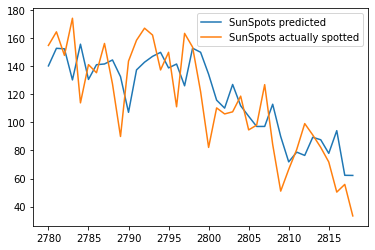

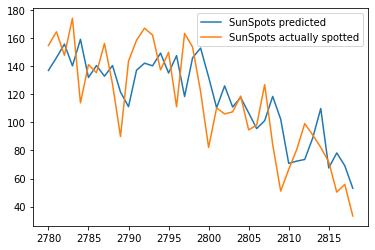

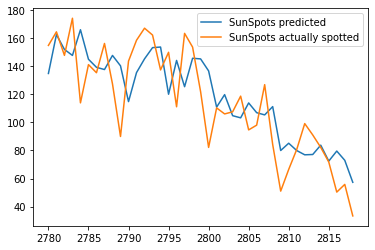

In [59]:
calculoEvaluacionModelo(MLPRegressor(),dataZurich4,norma)
calculoEvaluacionModelo(MLPRegressor(max_iter=10000),dataZurich4,norma)
calculoEvaluacionModelo(RandomForestRegressor(n_estimators=20, random_state=0),dataZurich4,norma)


## Hiperparametrización

Month 2780 - Error 0.09494
Month 2781 - Error 0.07199
Month 2782 - Error 0.02986
Month 2783 - Error 0.15805
Month 2784 - Error 0.37066
Month 2785 - Error 0.07681
Month 2786 - Error 0.03784
Month 2787 - Error 0.11813
Month 2788 - Error 0.15038
Month 2789 - Error 0.36132
Month 2790 - Error 0.29977
Month 2791 - Error 0.16085
Month 2792 - Error 0.14105
Month 2793 - Error 0.07292
Month 2794 - Error 0.13353
Month 2795 - Error 0.05111
Month 2796 - Error 0.31644
Month 2797 - Error 0.29687
Month 2798 - Error 0.00429
Month 2799 - Error 0.18164
Month 2800 - Error 0.41379
Month 2801 - Error 0.08014
Month 2802 - Error 0.10770
Month 2803 - Error 0.01192
Month 2804 - Error 0.08954
Month 2805 - Error 0.12033
Month 2806 - Error 0.00156
Month 2807 - Error 0.50965
Month 2808 - Error 0.31005
Month 2809 - Error 0.55274
Month 2810 - Error 0.05830
Month 2811 - Error 0.04313
Month 2812 - Error 0.12499
Month 2813 - Error 0.03058
Month 2814 - Error 0.09975
Month 2815 - Error 0.16692
Month 2816 - Error 0.52784
M

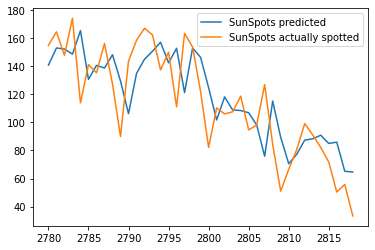

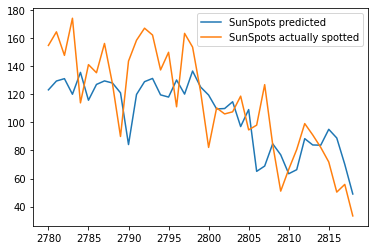

In [60]:
calculoEvaluacionModelo(MLPRegressor(max_iter=10000),dataZurich3,norma)
calculoEvaluacionModelo(MLPRegressor(max_iter=10000,activation='tanh'),dataZurich3,norma)

Month 2780 - Error 0.10070
Month 2781 - Error 0.08399
Month 2782 - Error 0.07511
Month 2783 - Error 0.17036
Month 2784 - Error 0.33193
Month 2785 - Error 0.09861
Month 2786 - Error 0.03261
Month 2787 - Error 0.15897
Month 2788 - Error 0.13352
Month 2789 - Error 0.38230
Month 2790 - Error 0.26073
Month 2791 - Error 0.11292
Month 2792 - Error 0.20434
Month 2793 - Error 0.05945
Month 2794 - Error 0.11981
Month 2795 - Error 0.04982
Month 2796 - Error 0.26488
Month 2797 - Error 0.29476
Month 2798 - Error 0.01713
Month 2799 - Error 0.16765
Month 2800 - Error 0.42264
Month 2801 - Error 0.06260
Month 2802 - Error 0.10432
Month 2803 - Error 0.08697
Month 2804 - Error 0.16323
Month 2805 - Error 0.20063
Month 2806 - Error 0.08125
Month 2807 - Error 0.24353
Month 2808 - Error 0.38841
Month 2809 - Error 0.51160
Month 2810 - Error 0.05467
Month 2811 - Error 0.11972
Month 2812 - Error 0.13256
Month 2813 - Error 0.03953
Month 2814 - Error 0.01705
Month 2815 - Error 0.03186
Month 2816 - Error 0.36758
M

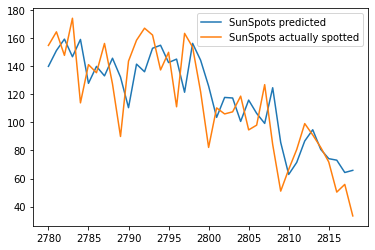

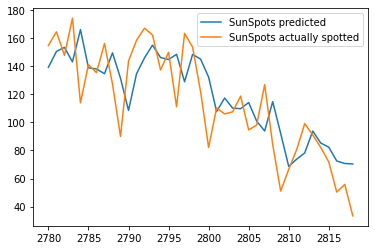

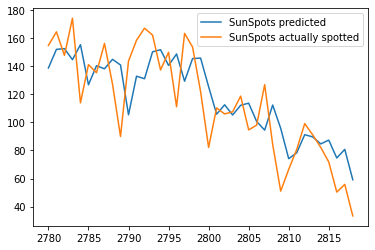

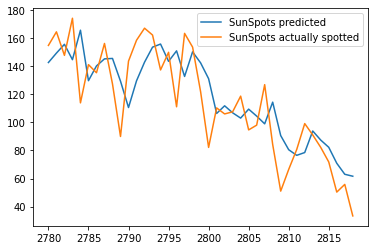

In [61]:
calculoEvaluacionModelo(MLPRegressor(max_iter=10000,hidden_layer_sizes=(200,)),dataZurich3,norma)
calculoEvaluacionModelo(MLPRegressor(max_iter=10000,hidden_layer_sizes=(50,)),dataZurich3,norma)
calculoEvaluacionModelo(MLPRegressor(max_iter=5000,hidden_layer_sizes=(200,)),dataZurich3,norma)
calculoEvaluacionModelo(MLPRegressor(max_iter=20000,hidden_layer_sizes=(50,)),dataZurich3,norma)

Month 2780 - Error 0.06574
Month 2781 - Error 0.09653
Month 2782 - Error 0.02149
Month 2783 - Error 0.12217
Month 2784 - Error 0.34773
Month 2785 - Error 0.04931
Month 2786 - Error 0.18417
Month 2787 - Error 0.10996
Month 2788 - Error 0.13396
Month 2789 - Error 0.35225
Month 2790 - Error 0.20453
Month 2791 - Error 0.15106
Month 2792 - Error 0.11766
Month 2793 - Error 0.09931
Month 2794 - Error 0.12416
Month 2795 - Error 0.03567
Month 2796 - Error 0.30161
Month 2797 - Error 0.25084
Month 2798 - Error 0.04230
Month 2799 - Error 0.21183
Month 2800 - Error 0.47808
Month 2801 - Error 0.13998
Month 2802 - Error 0.02722
Month 2803 - Error 0.00425
Month 2804 - Error 0.05871
Month 2805 - Error 0.10124
Month 2806 - Error 0.03477
Month 2807 - Error 0.08047
Month 2808 - Error 0.28352
Month 2809 - Error 0.33456
Month 2810 - Error 0.14587
Month 2811 - Error 0.21999
Month 2812 - Error 0.33291
Month 2813 - Error 0.09043
Month 2814 - Error 0.08249
Month 2815 - Error 0.33710
Month 2816 - Error 0.42022
M

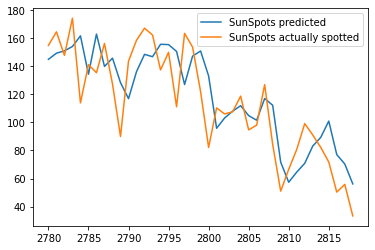

In [62]:
calculoEvaluacionModelo(MLPRegressor(max_iter=25000,hidden_layer_sizes=(1000,)),dataZurich3,norma)

Month 2780 - Error 0.02263
Month 2781 - Error 0.08076
Month 2782 - Error 0.00187
Month 2783 - Error 0.16421
Month 2784 - Error 0.36064
Month 2785 - Error 0.03207
Month 2786 - Error 0.03851
Month 2787 - Error 0.17283
Month 2788 - Error 0.14813
Month 2789 - Error 0.39333
Month 2790 - Error 0.41326
Month 2791 - Error 0.23118
Month 2792 - Error 0.20634
Month 2793 - Error 0.11536
Month 2794 - Error 0.14353
Month 2795 - Error 0.03326
Month 2796 - Error 0.22731
Month 2797 - Error 0.19730
Month 2798 - Error 0.04196
Month 2799 - Error 0.14195
Month 2800 - Error 0.39410
Month 2801 - Error 0.14132
Month 2802 - Error 0.09075
Month 2803 - Error 0.00927
Month 2804 - Error 0.14277
Month 2805 - Error 0.20689
Month 2806 - Error 0.69259
Month 2807 - Error 0.21599
Month 2808 - Error 0.18822
Month 2809 - Error 0.68922
Month 2810 - Error 0.00464
Month 2811 - Error 0.07490
Month 2812 - Error 0.40708
Month 2813 - Error 0.12867
Month 2814 - Error 0.06227
Month 2815 - Error 0.22468
Month 2816 - Error 0.55046
M

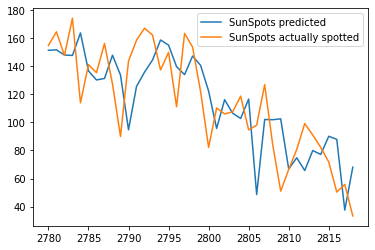

In [63]:
calculoEvaluacionModelo(MLPRegressor(max_iter=40000,hidden_layer_sizes=(1250,)),dataZurich3,norma)

## 4. Análisis de un segundo Dataframe

Ahora vamos a usar un dataframe con las ventas agregadas de los 15 productos más vendidos agregado para una cadena de distribución.

In [5]:
dataRetail = pd.read_csv('Dataframe_Retail.csv', delimiter=',')

In [6]:
dataRetail.head(20)

,Fecha,Referencia,Unidades,Ventas
0,2017-01-01,Cerveza tercio,18.000000,11.700000
1,2017-01-01,Baguetes 2 unidades,34.000000,33.320001
2,2017-01-02,Aceite de oliva virgen extra 5 l,53.000000,1184.550020
3,2017-01-02,Bolsa naranjas 2Kg.,1118.000000,1889.420064
4,2017-01-02,Mandarina,1752.468997,3356.279999
5,2017-01-02,Melo OR,399.428999,728.429999
6,2017-01-02,Baguetes 2 unidades,3572.000000,3257.839944
7,2017-01-02,Jamón reserva,48.515000,870.689999
8,2017-01-02,Cerveza tercio,1280.000000,802.150005
9,2017-01-02,Naranja en cajas,831.050001,1470.350000


In [27]:
dataRetail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10950 entries, 0 to 10949
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fecha       10950 non-null  object 
 1   Referencia  10950 non-null  object 
 2   Unidades    10950 non-null  float64
 3   Ventas      10950 non-null  float64
dtypes: float64(2), object(2)
memory usage: 342.3+ KB


In [7]:
print(dataRetail['Referencia'].unique())

['Cerveza tercio' 'Baguetes 2 unidades' 'Aceite de oliva virgen extra 5 l'
 'Bolsa naranjas 2Kg.' 'Mandarina' 'Melo  OR' 'Jamón reserva'
 'Naranja en cajas' 'Pack de plátanos'
 'MERLUZA PALANGRE 1 - 2 Kg (1 Caja 10Q.)' 'Tomate jugoso al peso'
 'Filetes de salmón' 'Sepia' 'Fresa premium 500gr']


In [26]:
dataSku = dataRetail[dataRetail['Referencia']=='Cerveza tercio']

In [27]:
dataSku.head()

,Fecha,Referencia,Unidades,Ventas
0,2017-01-01,Cerveza tercio,18.0,11.700000
8,2017-01-02,Cerveza tercio,1280.0,802.150005
13,2017-01-03,Cerveza tercio,1483.0,927.380006
29,2017-01-04,Cerveza tercio,1846.0,1156.010011
44,2017-01-05,Cerveza tercio,2210.0,1380.040010


In [28]:
dataSku.tail()

,Fecha,Referencia,Unidades,Ventas
10893,2019-05-14,Cerveza tercio,2124.0,1408.770016
10902,2019-05-15,Cerveza tercio,2139.0,1420.950016
10919,2019-05-16,Cerveza tercio,2303.0,1528.830020
10927,2019-05-17,Cerveza tercio,2793.0,1851.900021
10937,2019-05-18,Cerveza tercio,3015.0,1999.560019


In [29]:
dataSku = dataSku.reset_index()

In [31]:
dataSku.head()

,index,Fecha,Referencia,Unidades,Ventas
0,0,2017-01-01,Cerveza tercio,18.0,11.700000
1,8,2017-01-02,Cerveza tercio,1280.0,802.150005
2,13,2017-01-03,Cerveza tercio,1483.0,927.380006
3,29,2017-01-04,Cerveza tercio,1846.0,1156.010011
4,44,2017-01-05,Cerveza tercio,2210.0,1380.040010


In [32]:
dataSku.drop('index', axis=1, inplace=True)
dataSku['Fecha Format'] = pd.to_datetime(dataSku['Fecha'], format='%Y-%m-%d')

In [33]:
dataSku.tail()

,Fecha,Referencia,Unidades,Ventas,Fecha Format
857,2019-05-14,Cerveza tercio,2124.0,1408.770016,2019-05-14
858,2019-05-15,Cerveza tercio,2139.0,1420.950016,2019-05-15
859,2019-05-16,Cerveza tercio,2303.0,1528.830020,2019-05-16
860,2019-05-17,Cerveza tercio,2793.0,1851.900021,2019-05-17
861,2019-05-18,Cerveza tercio,3015.0,1999.560019,2019-05-18


In [17]:
dataSku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Fecha         862 non-null    object        
 1   Referencia    862 non-null    object        
 2   Unidades      862 non-null    float64       
 3   Ventas        862 non-null    float64       
 4   Fecha Format  862 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 33.8+ KB


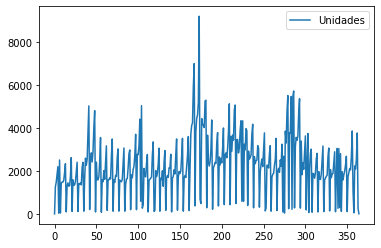

In [18]:
dataSku[['Fecha','Unidades']][:365].plot()

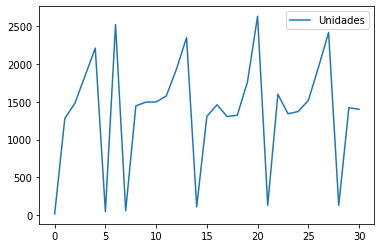

In [19]:
dataSku[['Fecha','Unidades']][:31].plot()

In [20]:
dataSku['OffsetDays'] = dataSku['Fecha Format'] - dataSku['Fecha Format'].iloc[0]
dataSku['OffsetDays'] = dataSku['OffsetDays'].dt.days
dataSku

,Fecha,Referencia,Unidades,Ventas,Fecha Format,OffsetDays
0,2017-01-01,Cerveza tercio,18.0,11.700000,2017-01-01,0
1,2017-01-02,Cerveza tercio,1280.0,802.150005,2017-01-02,1
2,2017-01-03,Cerveza tercio,1483.0,927.380006,2017-01-03,2
3,2017-01-04,Cerveza tercio,1846.0,1156.010011,2017-01-04,3
4,2017-01-05,Cerveza tercio,2210.0,1380.040010,2017-01-05,4
...,...,...,...,...,...,...
857,2019-05-14,Cerveza tercio,2124.0,1408.770016,2019-05-14,863
858,2019-05-15,Cerveza tercio,2139.0,1420.950016,2019-05-15,864
859,2019-05-16,Cerveza tercio,2303.0,1528.830020,2019-05-16,865
860,2019-05-17,Cerveza tercio,2793.0,1851.900021,2019-05-17,866


In [42]:
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_log_error(ytrue, ypred))

In [43]:
def calculoEvaluacionModelo(modelo,df,norm):

    xPredicted = []
    yPredicted = []
    ySpotted = []
    mean_error = []

    for day in range(800,861):
        train = df[df['OffsetDays'] < day]
        val = df[df['OffsetDays'] == day]       
        
        xtr, xts = train.drop(['Unidades'], axis=1), val.drop(['Unidades'], axis=1)
        
        if(norm==True):
            sc = StandardScaler()  
            xtr = sc.fit_transform(xtr)  
            xts = sc.transform(xts)  
        ytr, yts = train['Unidades'].values, val['Unidades'].values  

        mdl = modelo
        mdl.fit(xtr, ytr)

        p = mdl.predict(xts)

        xPredicted=xPredicted + [day]
        yPredicted=yPredicted + [p[0]]
        ySpotted = ySpotted + [yts[0]]

        error = rmsle(yts, p)
        print('Month %d - Error %.5f' % (day, error))
        mean_error.append(error)

    print('Mean Error = %.5f' % np.mean(mean_error))
    prediction = pd.DataFrame(
        {'Sold units predicted': yPredicted,
         'Sold units actually spotted': ySpotted
        },index=xPredicted)
    prediction.plot()

## Predicción simple

In [25]:
norma=False
dataSku_simple = dataSku[['OffsetDays','Unidades']].copy()
dataSku_simple

#calculoEvaluacionModelo(MLPRegressor(),dataSku_simple,norma)
#calculoEvaluacionModelo(MLPRegressor(max_iter=10000),dataSku_simple,norma)
#calculoEvaluacionModelo(RandomForestRegressor(n_estimators=20, random_state=0),dataSku_simple,norma)

,OffsetDays,Unidades
0,0,18.0
1,1,1280.0
2,2,1483.0
3,3,1846.0
4,4,2210.0
...,...,...
857,863,2124.0
858,864,2139.0
859,865,2303.0
860,866,2793.0


## Adición de lags

In [81]:
dataSku_lag = dataSku[['OffsetDays','Unidades']].copy()

dataSku_lag['Unidades_prev1'] = dataSku_lag['Unidades'].shift(1)
dataSku_lag['Unidades_prev2'] = dataSku_lag['Unidades'].shift(2)
dataSku_lag['Unidades_prev3'] = dataSku_lag['Unidades'].shift(3)
dataSku_lag['Unidades_prev4'] = dataSku_lag['Unidades'].shift(4)
dataSku_lag['Unidades_prev5'] = dataSku_lag['Unidades'].shift(5)
dataSku_lag['Unidades_prev6'] = dataSku_lag['Unidades'].shift(6)
dataSku_lag['Unidades_prev7'] = dataSku_lag['Unidades'].shift(7)

dataSku_lag=dataSku_lag.dropna()

In [82]:
dataSku_lag.tail()

,OffsetDays,Unidades,Unidades_prev1,Unidades_prev2,Unidades_prev3,Unidades_prev4,Unidades_prev5,Unidades_prev6,Unidades_prev7
857,863,2124.0,2129.0,101.0,2378.0,3651.0,2833.0,2064.0,2802.0
858,864,2139.0,2124.0,2129.0,101.0,2378.0,3651.0,2833.0,2064.0
859,865,2303.0,2139.0,2124.0,2129.0,101.0,2378.0,3651.0,2833.0
860,866,2793.0,2303.0,2139.0,2124.0,2129.0,101.0,2378.0,3651.0
861,867,3015.0,2793.0,2303.0,2139.0,2124.0,2129.0,101.0,2378.0


Month 800 - Error 0.10630
Month 801 - Error 0.13878
Month 802 - Error 0.14383
Month 803 - Error 0.31270
Month 804 - Error 0.14421
Month 805 - Error 0.86368
Month 806 - Error 0.37322
Month 807 - Error 0.27175
Month 808 - Error 0.07758
Month 809 - Error 0.16015
Month 810 - Error 0.05304
Month 811 - Error 0.13687
Month 812 - Error 0.94922
Month 813 - Error 0.11343
Month 814 - Error 0.26698
Month 815 - Error 0.04233
Month 816 - Error 0.06855
Month 817 - Error 0.03691
Month 818 - Error 0.09141
Month 819 - Error 0.65799
Month 820 - Error 0.25867
Month 821 - Error 0.10531
Month 822 - Error 0.24302
Month 823 - Error 0.07896
Month 824 - Error 0.15077
Month 825 - Error 0.19109
Month 826 - Error 0.51469
Month 827 - Error 0.22836
Month 828 - Error 0.09159
Month 829 - Error 0.18567
Month 830 - Error 0.00599
Month 831 - Error 0.02399
Month 832 - Error 0.08029
Month 833 - Error 0.08248
Month 834 - Error 0.18116
Month 835 - Error 0.15244
Month 836 - Error 0.22439
Month 837 - Error 0.23754
Month 838 - 

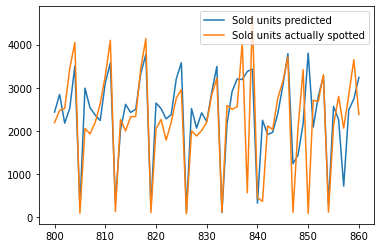

In [83]:
norma=False
#calculoEvaluacionModelo(MLPRegressor(),dataSku_lag,norma)
#calculoEvaluacionModelo(MLPRegressor(max_iter=10000),dataSku_lag,norma)
calculoEvaluacionModelo(RandomForestRegressor(n_estimators=20, random_state=0),dataSku_lag,norma)

## Uso de variables booleanas de activación

### Días de la semana

Como vimos en una primera ojeada a los datos dentro de una semana había cierta estacionalidad en las ventas de esta referencia, al estar nuestra variable de estudio influenciada por estos valores, tenemos que crearnos variables adicionales para que el modelo pueda recoger esta información.

In [84]:
dataSku.head()
dataSku['Día de la semana'] = dataSku['Fecha Format'].dt.dayofweek

In [85]:
dataSku.head()
## Por defecto el 0 es Lunes

,Fecha,Referencia,Unidades,Ventas,Fecha Format,OffsetDays,Día de la semana
0,2017-01-01,Cerveza tercio,18.0,11.700000,2017-01-01,0,6
1,2017-01-02,Cerveza tercio,1280.0,802.150005,2017-01-02,1,0
2,2017-01-03,Cerveza tercio,1483.0,927.380006,2017-01-03,2,1
3,2017-01-04,Cerveza tercio,1846.0,1156.010011,2017-01-04,3,2
4,2017-01-05,Cerveza tercio,2210.0,1380.040010,2017-01-05,4,3


In [86]:
dataSku['Lunes'] =  dataSku['Día de la semana'].apply(lambda x: 1 if (x==0) else 0) 
dataSku['Martes'] =  dataSku['Día de la semana'].apply(lambda x: 1 if (x==1) else 0) 
dataSku['Miércoles'] =  dataSku['Día de la semana'].apply(lambda x: 1 if (x==2) else 0) 
dataSku['Jueves'] =  dataSku['Día de la semana'].apply(lambda x: 1 if (x==3) else 0) 
dataSku['Viernes'] =  dataSku['Día de la semana'].apply(lambda x: 1 if (x==4) else 0) 
dataSku['Sábado'] =  dataSku['Día de la semana'].apply(lambda x: 1 if (x==5) else 0) 
dataSku['Domingo'] =  dataSku['Día de la semana'].apply(lambda x: 1 if (x==6) else 0) 

In [87]:
dataSku.head(20)

,Fecha,Referencia,Unidades,Ventas,Fecha Format,OffsetDays,Día de la semana,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Domingo
0,2017-01-01,Cerveza tercio,18.0,11.700000,2017-01-01,0,6,0,0,0,0,0,0,1
1,2017-01-02,Cerveza tercio,1280.0,802.150005,2017-01-02,1,0,1,0,0,0,0,0,0
2,2017-01-03,Cerveza tercio,1483.0,927.380006,2017-01-03,2,1,0,1,0,0,0,0,0
3,2017-01-04,Cerveza tercio,1846.0,1156.010011,2017-01-04,3,2,0,0,1,0,0,0,0
4,2017-01-05,Cerveza tercio,2210.0,1380.040010,2017-01-05,4,3,0,0,0,1,0,0,0
5,2017-01-06,Cerveza tercio,48.0,31.680000,2017-01-06,5,4,0,0,0,0,1,0,0
6,2017-01-07,Cerveza tercio,2522.0,1600.019997,2017-01-07,6,5,0,0,0,0,0,1,0
7,2017-01-08,Cerveza tercio,60.0,37.860000,2017-01-08,7,6,0,0,0,0,0,0,1
8,2017-01-09,Cerveza tercio,1446.0,914.399996,2017-01-09,8,0,1,0,0,0,0,0,0
9,2017-01-10,Cerveza tercio,1497.0,950.999998,2017-01-10,9,1,0,1,0,0,0,0,0


In [88]:
dataSku_lag_days = dataSku[['OffsetDays','Unidades','Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']].copy()

dataSku_lag_days['Unidades_prev1'] = dataSku_lag_days['Unidades'].shift(1)
dataSku_lag_days['Unidades_prev2'] = dataSku_lag_days['Unidades'].shift(2)
dataSku_lag_days['Unidades_prev3'] = dataSku_lag_days['Unidades'].shift(3)
dataSku_lag_days['Unidades_prev4'] = dataSku_lag_days['Unidades'].shift(4)
dataSku_lag_days['Unidades_prev5'] = dataSku_lag_days['Unidades'].shift(5)
dataSku_lag_days['Unidades_prev6'] = dataSku_lag_days['Unidades'].shift(6)
dataSku_lag_days['Unidades_prev7'] = dataSku_lag_days['Unidades'].shift(7)

dataSku_lag_days=dataSku_lag_days.dropna()
dataSku_lag_days.head()

,OffsetDays,Unidades,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Domingo,Unidades_prev1,Unidades_prev2,Unidades_prev3,Unidades_prev4,Unidades_prev5,Unidades_prev6,Unidades_prev7
7,7,60.0,0,0,0,0,0,0,1,2522.0,48.0,2210.0,1846.0,1483.0,1280.0,18.0
8,8,1446.0,1,0,0,0,0,0,0,60.0,2522.0,48.0,2210.0,1846.0,1483.0,1280.0
9,9,1497.0,0,1,0,0,0,0,0,1446.0,60.0,2522.0,48.0,2210.0,1846.0,1483.0
10,10,1498.0,0,0,1,0,0,0,0,1497.0,1446.0,60.0,2522.0,48.0,2210.0,1846.0
11,11,1578.0,0,0,0,1,0,0,0,1498.0,1497.0,1446.0,60.0,2522.0,48.0,2210.0


Month 800 - Error 0.20060
Month 801 - Error 0.03575
Month 802 - Error 0.00821
Month 803 - Error 0.02724
Month 804 - Error 0.07359
Month 805 - Error 0.65384
Month 806 - Error 0.45885
Month 807 - Error 0.30839
Month 808 - Error 0.02398
Month 809 - Error 0.19907
Month 810 - Error 0.09693
Month 811 - Error 0.09484
Month 812 - Error 0.91124
Month 813 - Error 0.23672
Month 814 - Error 0.19947
Month 815 - Error 0.05104
Month 816 - Error 0.04779
Month 817 - Error 0.02909
Month 818 - Error 0.07782
Month 819 - Error 0.11778
Month 820 - Error 0.18752
Month 821 - Error 0.02356
Month 822 - Error 0.39035
Month 823 - Error 0.02750
Month 824 - Error 0.15739
Month 825 - Error 0.15094
Month 826 - Error 0.56567
Month 827 - Error 0.21969
Month 828 - Error 0.24100
Month 829 - Error 0.24703
Month 830 - Error 0.00795
Month 831 - Error 0.03667
Month 832 - Error 0.06608
Month 833 - Error 0.14889
Month 834 - Error 0.19400
Month 835 - Error 0.09182
Month 836 - Error 0.10101
Month 837 - Error 0.28918
Month 838 - 

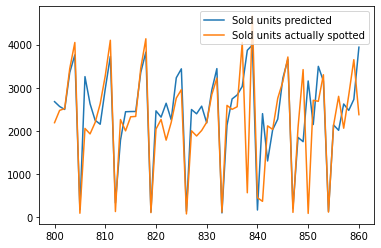

In [89]:
norma=False
#calculoEvaluacionModelo(MLPRegressor(),dataSku_lag_days,norma)
#calculoEvaluacionModelo(MLPRegressor(max_iter=10000),dataSku_lag_days,norma)
calculoEvaluacionModelo(RandomForestRegressor(n_estimators=20, random_state=0),dataSku_lag_days,norma)

#### ¿ Se puede añadir alguna otra variable que influya?

### Meses del año

In [90]:
dataSku['Mes'] = dataSku['Fecha Format'].dt.month

In [91]:
dataSku.head()

,Fecha,Referencia,Unidades,Ventas,Fecha Format,OffsetDays,Día de la semana,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Domingo,Mes
0,2017-01-01,Cerveza tercio,18.0,11.700000,2017-01-01,0,6,0,0,0,0,0,0,1,1
1,2017-01-02,Cerveza tercio,1280.0,802.150005,2017-01-02,1,0,1,0,0,0,0,0,0,1
2,2017-01-03,Cerveza tercio,1483.0,927.380006,2017-01-03,2,1,0,1,0,0,0,0,0,1
3,2017-01-04,Cerveza tercio,1846.0,1156.010011,2017-01-04,3,2,0,0,1,0,0,0,0,1
4,2017-01-05,Cerveza tercio,2210.0,1380.040010,2017-01-05,4,3,0,0,0,1,0,0,0,1


In [92]:
dataSku['Enero'] =  dataSku['Mes'].apply(lambda x: 1 if (x==1) else 0) 
dataSku['Febrero'] =  dataSku['Mes'].apply(lambda x: 1 if (x==2) else 0) 
dataSku['Marzo'] =  dataSku['Mes'].apply(lambda x: 1 if (x==3) else 0) 
dataSku['Abril'] =  dataSku['Mes'].apply(lambda x: 1 if (x==4) else 0) 
dataSku['Mayo'] =  dataSku['Mes'].apply(lambda x: 1 if (x==5) else 0) 
dataSku['Junio'] =  dataSku['Mes'].apply(lambda x: 1 if (x==6) else 0) 
dataSku['Julio'] =  dataSku['Mes'].apply(lambda x: 1 if (x==7) else 0) 
dataSku['Agosto'] =  dataSku['Mes'].apply(lambda x: 1 if (x==8) else 0) 
dataSku['Septiembre'] =  dataSku['Mes'].apply(lambda x: 1 if (x==9) else 0) 
dataSku['Octubre'] =  dataSku['Mes'].apply(lambda x: 1 if (x==10) else 0) 
dataSku['Noviembre'] =  dataSku['Mes'].apply(lambda x: 1 if (x==11) else 0) 
dataSku['Diciembre'] =  dataSku['Mes'].apply(lambda x: 1 if (x==12) else 0) 
 

In [93]:
dataSku.tail()

,Fecha,Referencia,Unidades,Ventas,Fecha Format,OffsetDays,Día de la semana,Lunes,Martes,Miércoles,...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
857,2019-05-14,Cerveza tercio,2124.0,1408.770016,2019-05-14,863,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
858,2019-05-15,Cerveza tercio,2139.0,1420.950016,2019-05-15,864,2,0,0,1,...,0,0,1,0,0,0,0,0,0,0
859,2019-05-16,Cerveza tercio,2303.0,1528.830020,2019-05-16,865,3,0,0,0,...,0,0,1,0,0,0,0,0,0,0
860,2019-05-17,Cerveza tercio,2793.0,1851.900021,2019-05-17,866,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
861,2019-05-18,Cerveza tercio,3015.0,1999.560019,2019-05-18,867,5,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [94]:
dataSku_lag_days_month = dataSku[['OffsetDays','Unidades','Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo','Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']].copy()

dataSku_lag_days_month['Unidades_prev1'] = dataSku_lag_days_month['Unidades'].shift(1)
dataSku_lag_days_month['Unidades_prev2'] = dataSku_lag_days_month['Unidades'].shift(2)
dataSku_lag_days_month['Unidades_prev3'] = dataSku_lag_days_month['Unidades'].shift(3)
dataSku_lag_days_month['Unidades_prev4'] = dataSku_lag_days_month['Unidades'].shift(4)
dataSku_lag_days_month['Unidades_prev5'] = dataSku_lag_days_month['Unidades'].shift(5)
dataSku_lag_days_month['Unidades_prev6'] = dataSku_lag_days_month['Unidades'].shift(6)
dataSku_lag_days_month['Unidades_prev7'] = dataSku_lag_days_month['Unidades'].shift(7)

dataSku_lag_days_month=dataSku_lag_days_month.dropna()
dataSku_lag_days_month.head()

,OffsetDays,Unidades,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Domingo,Enero,...,Octubre,Noviembre,Diciembre,Unidades_prev1,Unidades_prev2,Unidades_prev3,Unidades_prev4,Unidades_prev5,Unidades_prev6,Unidades_prev7
7,7,60.0,0,0,0,0,0,0,1,1,...,0,0,0,2522.0,48.0,2210.0,1846.0,1483.0,1280.0,18.0
8,8,1446.0,1,0,0,0,0,0,0,1,...,0,0,0,60.0,2522.0,48.0,2210.0,1846.0,1483.0,1280.0
9,9,1497.0,0,1,0,0,0,0,0,1,...,0,0,0,1446.0,60.0,2522.0,48.0,2210.0,1846.0,1483.0
10,10,1498.0,0,0,1,0,0,0,0,1,...,0,0,0,1497.0,1446.0,60.0,2522.0,48.0,2210.0,1846.0
11,11,1578.0,0,0,0,1,0,0,0,1,...,0,0,0,1498.0,1497.0,1446.0,60.0,2522.0,48.0,2210.0


Month 800 - Error 0.09767
Month 801 - Error 0.06735
Month 802 - Error 0.00479
Month 803 - Error 0.07410
Month 804 - Error 0.10811
Month 805 - Error 0.66569
Month 806 - Error 0.41449
Month 807 - Error 0.33494
Month 808 - Error 0.05857
Month 809 - Error 0.11638
Month 810 - Error 0.09673
Month 811 - Error 0.07531
Month 812 - Error 0.60694
Month 813 - Error 0.47414
Month 814 - Error 0.14666
Month 815 - Error 0.01053
Month 816 - Error 0.10157
Month 817 - Error 0.03857
Month 818 - Error 0.06818
Month 819 - Error 0.12583
Month 820 - Error 0.20127
Month 821 - Error 0.08865
Month 822 - Error 0.33617
Month 823 - Error 0.04036
Month 824 - Error 0.14640
Month 825 - Error 0.14195
Month 826 - Error 0.42240
Month 827 - Error 0.03920
Month 828 - Error 0.13634
Month 829 - Error 0.11515
Month 830 - Error 0.04770
Month 831 - Error 0.01607
Month 832 - Error 0.04159
Month 833 - Error 0.13974
Month 834 - Error 0.23179
Month 835 - Error 0.11936
Month 836 - Error 0.09001
Month 837 - Error 0.34376
Month 838 - 

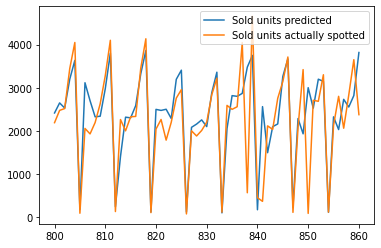

In [95]:
norma=False
#calculoEvaluacionModelo(MLPRegressor(),dataSku_lag_days_month,norma)
#calculoEvaluacionModelo(MLPRegressor(max_iter=10000),dataSku_lag_days_month,norma)
calculoEvaluacionModelo(RandomForestRegressor(n_estimators=20, random_state=0),dataSku_lag_days_month,norma)